In [2]:
from pytadbit.parsers.genome_parser import parse_fasta

In [4]:
genome_seq = parse_fasta('/media/storage/db/reference_genome/Homo_sapiens/hg38/hg38.fa')

Parsing chr1
Parsing chr2
Parsing chr3
Parsing chr4
Parsing chr5
Parsing chr6
Parsing chr7
Parsing chr8
Parsing chr9
Parsing chr10
Parsing chr11
Parsing chr12
Parsing chr13
Parsing chr14
Parsing chr15
Parsing chr16
Parsing chr17
Parsing chr18
Parsing chr19
Parsing chr20
Parsing chr21
Parsing chr22
Parsing chrX
Parsing chrY
Parsing chrM


In [7]:
maps1 = ['results/HindIII/01_mapping/mapHindIII_r1/K562_HindIII_1_full_1-end.map',
         'results/HindIII/01_mapping/mapHindIII_r1/K562_HindIII_1_frag_1-end.map']

In [8]:
maps2 = ['results/HindIII/01_mapping/mapHindIII_r2/K562_HindIII_2_full_1-end.map',
         'results/HindIII/01_mapping/mapHindIII_r2/K562_HindIII_2_frag_1-end.map']

In [9]:
!mkdir -p results/HindIII/02_parsing

In [10]:
from pytadbit.parsers.map_parser import parse_map

In [11]:
parse_map(maps1,
          maps2,
          'results/HindIII/02_parsing/reads1.tsv',
          'results/HindIII/02_parsing/reads2.tsv',
         genome_seq=genome_seq, re_name='HindIII',
         verbose=True)

Searching and mapping RE sites to the reference genome
Found 860368 RE sites
Loading read1
loading file: results/HindIII/01_mapping/mapHindIII_r1/K562_HindIII_1_full_1-end.map
loading file: results/HindIII/01_mapping/mapHindIII_r1/K562_HindIII_1_frag_1-end.map
Merge sort...........
Getting Multiple contacts
Loading read2
loading file: results/HindIII/01_mapping/mapHindIII_r2/K562_HindIII_2_full_1-end.map
loading file: results/HindIII/01_mapping/mapHindIII_r2/K562_HindIII_2_frag_1-end.map
Merge sort..........
Getting Multiple contacts


({0: {1: 6047543, 2: 4605716}, 1: {1: 5940550, 2: 4357315}},
 {0: 1622735, 1: 1521698})

In [12]:
! head -n 50 results/HindIII/02_parsing/reads1.tsv

# Chromosome lengths (order matters):
# CRM chr1	248956422
# CRM chr2	242193529
# CRM chr3	198295559
# CRM chr4	190214555
# CRM chr5	181538259
# CRM chr6	170805979
# CRM chr7	159345973
# CRM chr8	145138636
# CRM chr9	138394717
# CRM chr10	133797422
# CRM chr11	135086622
# CRM chr12	133275309
# CRM chr13	114364328
# CRM chr14	107043718
# CRM chr15	101991189
# CRM chr16	90338345
# CRM chr17	83257441
# CRM chr18	80373285
# CRM chr19	58617616
# CRM chr20	64444167
# CRM chr21	46709983
# CRM chr22	50818468
# CRM chrX	156040895
# CRM chrY	57227415
# CRM chrM	16569
# Mapped	reads count by iteration
# MAPPED 1 6047543
# MAPPED 2 4605716
NS500645:59:HCL32BGXY:1:11101:10000:16279	chr10	88637181	1	75	88636785	88638533
NS500645:59:HCL32BGXY:1:11101:10000:8112	chr3	36464588	1	75	36463181	36464653
NS500645:59:HCL32BGXY:1:11101:10002:9093	chr6	137108858	1	40	137107790	137108899
NS500645:59:HCL32BGXY:1:11101:10002:9922	chrX	69197335	0	75	69197264	69206899
NS500645:59:HCL32BGXY:1:11101:10003:18293	chrX	

In [13]:
! head -n 50 results/HindIII/02_parsing/reads2.tsv

# Chromosome lengths (order matters):
# CRM chr1	248956422
# CRM chr2	242193529
# CRM chr3	198295559
# CRM chr4	190214555
# CRM chr5	181538259
# CRM chr6	170805979
# CRM chr7	159345973
# CRM chr8	145138636
# CRM chr9	138394717
# CRM chr10	133797422
# CRM chr11	135086622
# CRM chr12	133275309
# CRM chr13	114364328
# CRM chr14	107043718
# CRM chr15	101991189
# CRM chr16	90338345
# CRM chr17	83257441
# CRM chr18	80373285
# CRM chr19	58617616
# CRM chr20	64444167
# CRM chr21	46709983
# CRM chr22	50818468
# CRM chrX	156040895
# CRM chrY	57227415
# CRM chrM	16569
# Mapped	reads count by iteration
# MAPPED 1 5940550
# MAPPED 2 4357315
NS500645:59:HCL32BGXY:1:11101:10000:16279	chr10	88619681	0	75	88619497	88630956
NS500645:59:HCL32BGXY:1:11101:10000:8112~2~	chr3	36464657	0	59	36464653	36465449
NS500645:59:HCL32BGXY:1:11101:10002:9093	chr18	38400052	0	75	38399590	38401951
NS500645:59:HCL32BGXY:1:11101:10002:9922	chrX	72292745	0	75	72292652	72295414
NS500645:59:HCL32BGXY:1:11101:10003:18293	chrX

In [14]:
from pytadbit.mapping import get_intersection

In [16]:
! mkdir -p results/HindIII/03_filtering

In [17]:
get_intersection('results/HindIII/02_parsing/reads1.tsv',
                 'results/HindIII/02_parsing/reads2.tsv',
                 'results/HindIII/03_filtering/reads12.tsv',
                  verbose=True)

Getting intersection of reads 1 and reads 2:
 
  .........
Found 8178944 pair of reads mapping uniquely
Sorting each temporary file by genomic coordinate
    1025/1025 sorted files
Removing temporary files...


(8178944, {2: 2416873, 3: 139115, 4: 2})

In [18]:
! head -n50 results/HindIII/03_filtering/reads12.tsv

# CRM chr1	248956422
# CRM chr2	242193529
# CRM chr3	198295559
# CRM chr4	190214555
# CRM chr5	181538259
# CRM chr6	170805979
# CRM chr7	159345973
# CRM chr8	145138636
# CRM chr9	138394717
# CRM chr10	133797422
# CRM chr11	135086622
# CRM chr12	133275309
# CRM chr13	114364328
# CRM chr14	107043718
# CRM chr15	101991189
# CRM chr16	90338345
# CRM chr17	83257441
# CRM chr18	80373285
# CRM chr19	58617616
# CRM chr20	64444167
# CRM chr21	46709983
# CRM chr22	50818468
# CRM chrX	156040895
# CRM chrY	57227415
# CRM chrM	16569
NS500645:59:HCL32BGXY:1:11102:26481:1379	chr1	1001140	1	75	992015	1001575	chr1	1001256	0	75	992015	1001575
NS500645:59:HCL32BGXY:1:12110:26115:5745	chr1	1001324	1	75	992015	1001575	chr21	46033968	0	75	46030463	46041407
NS500645:59:HCL32BGXY:1:21206:21324:3203	chr1	1001334	1	75	992015	1001575	chr1	1001579	0	59	1001575	1007038
NS500645:59:HCL32BGXY:1:13307:21816:7609	chr1	1001500	1	75	992015	1001575	chr1	1451683	1	52	1450886	1451736
NS500645:59:HCL32BGXY:1:12106:1847:1412

In [19]:
from pytadbit.mapping.analyze import plot_distance_vs_interactions

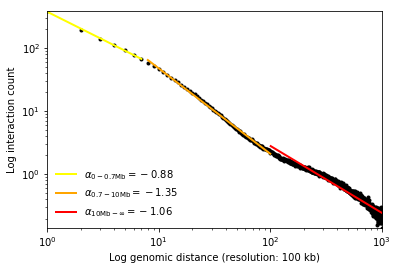

((-0.88265018662076211, 5.9164938010086949, -0.99863993019479413),
 (-1.3501559560452454, 6.9658028500495099, -0.99882570064420828),
 (-1.0587521964219113, 5.9115998331601851, -0.97867093398859228))

In [20]:
plot_distance_vs_interactions(
     'results/HindIII/03_filtering/reads12.tsv',
     resolution=100000, max_diff=1000, show=True)

In [21]:
from pytadbit.mapping.analyze import plot_genomic_distribution

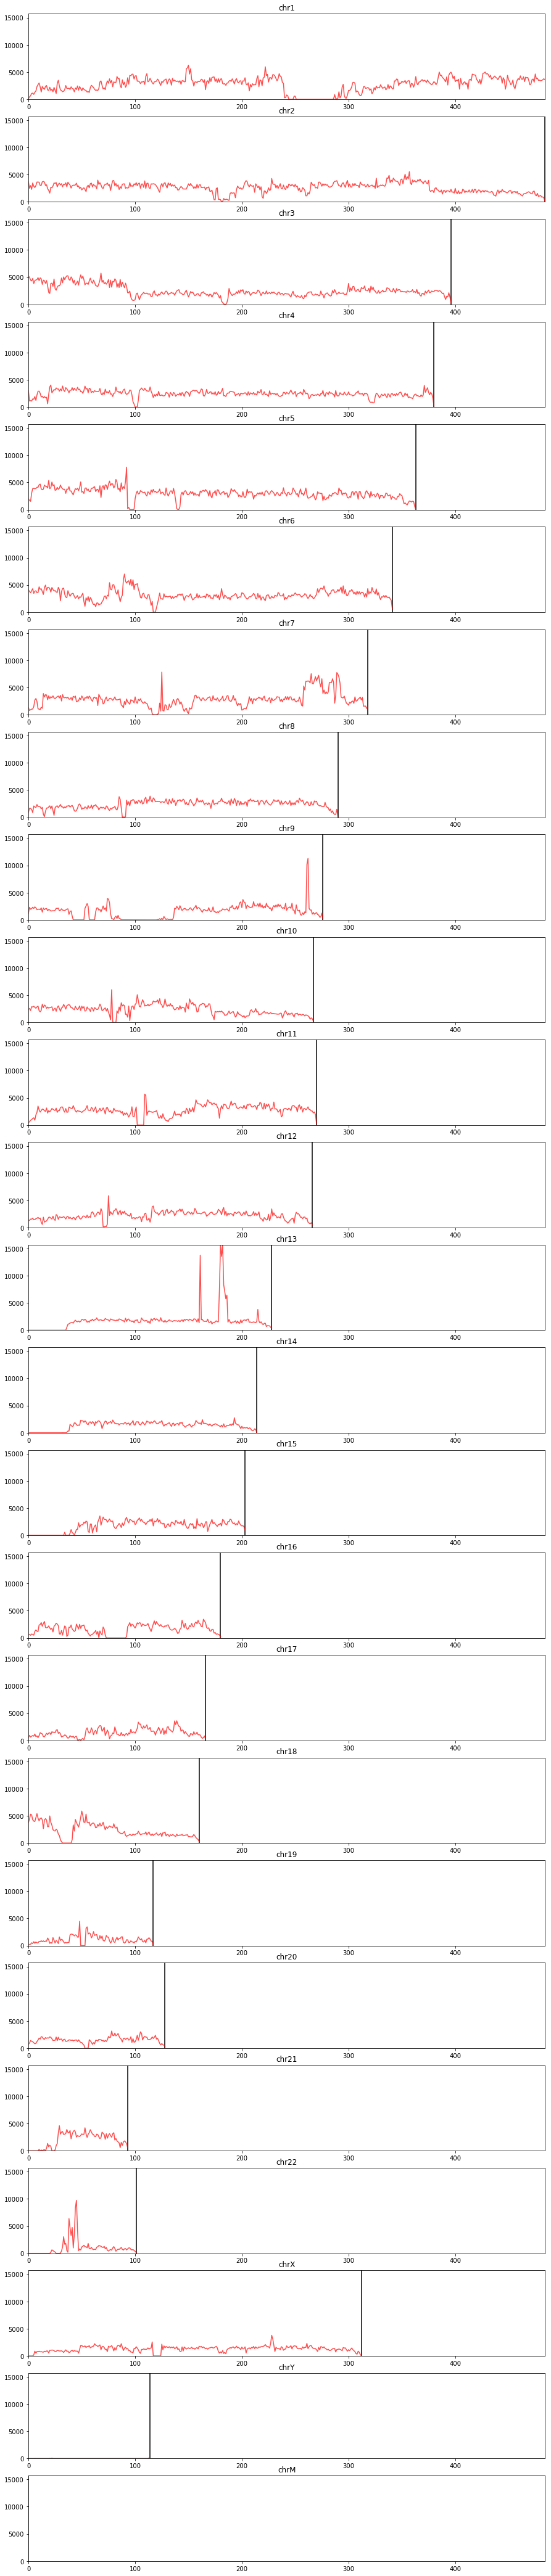

In [23]:
plot_genomic_distribution(
'results/HindIII/03_filtering/reads12.tsv',
 resolution=500000, show=True)

In [29]:
from pytadbit.mapping.analyze import hic_map

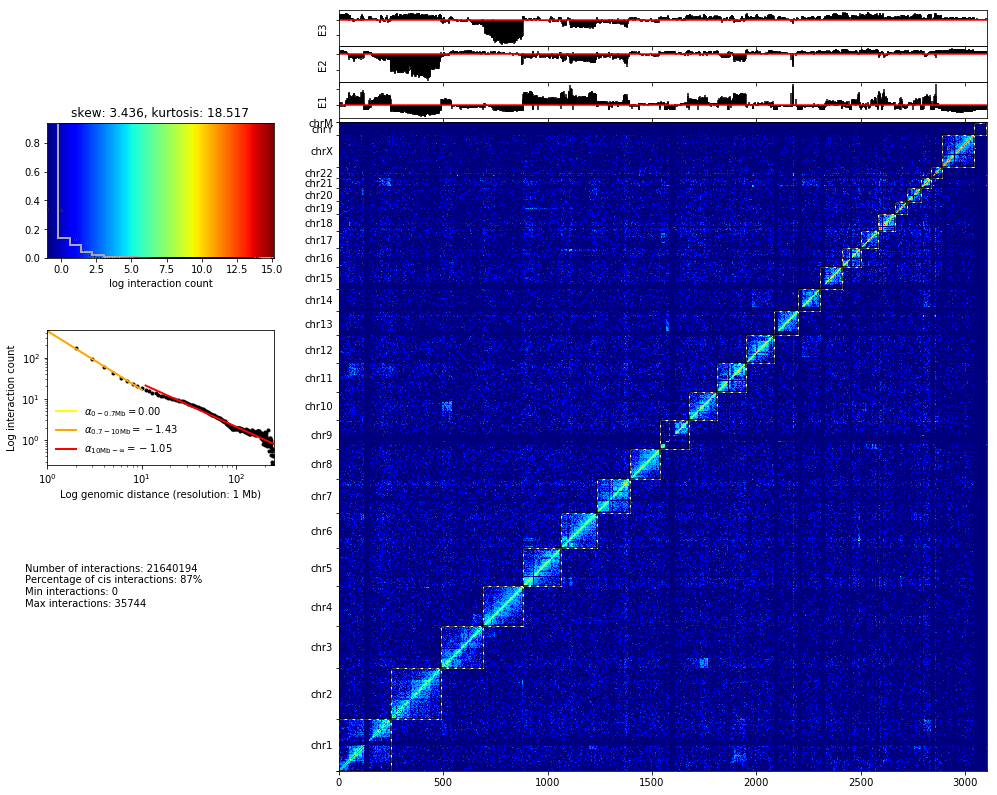

In [30]:
hic_map ('results/HindIII/03_filtering/reads12.tsv',
         resolution=1000000, show=True)

In [31]:
from pytadbit.mapping.analyze import insert_sizes

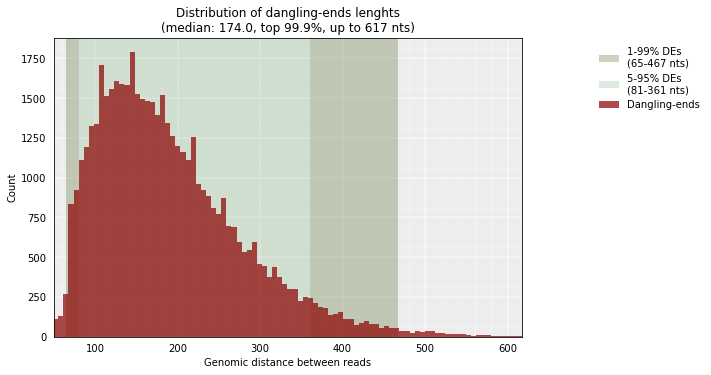

[174.0, 617.01000000000931]

In [32]:
insert_sizes ('results/HindIII/03_filtering/reads12.tsv',
              show=True, nreads=100000)

In [33]:
from pytadbit.mapping.filter import filter_reads

In [37]:
filter_reads ('results/HindIII/03_filtering/reads12.tsv',
              max_molecule_length=750, min_dist_to_re=500)

Filtered reads (and percentage of total):

     Mapped both                :     13708282 (100.00%)
  -----------------------------------------------------
   1- self-circle               :        37383 (  0.27%)
   2- dangling-end              :       660146 (  4.82%)
   3- error                     :        37395 (  0.27%)
   4- extra dangling-end        :      3773498 ( 27.53%)
   5- too close from RES        :      3277369 ( 23.91%)
   6- too short                 :       296853 (  2.17%)
   7- too large                 :         1843 (  0.01%)
   8- over-represented          :       411157 (  3.00%)
   9- duplicated                :       324490 (  2.37%)
  10- random breaks             :       968492 (  7.07%)


{1: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_self-circle.tsv',
  'name': 'self-circle',
  'reads': 37383},
 2: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_dangling-end.tsv',
  'name': 'dangling-end',
  'reads': 660146},
 3: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_error.tsv',
  'name': 'error',
  'reads': 37395},
 4: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_extra_dangling-end.tsv',
  'name': 'extra dangling-end',
  'reads': 3773498},
 5: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_too_close_from_RES.tsv',
  'name': 'too close from RES',
  'reads': 3277369},
 6: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_too_short.tsv',
  'name': 'too short',
  'reads': 296853},
 7: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_too_large.tsv',
  'name': 'too large',
  'reads': 1843},
 8: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_over-represented.tsv',
  'name': 'over-represented',
  'reads': 411157},
 9: {'fnam': 'results/HindIII/03_filte

In [35]:
masked= {1: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_self-circle.tsv',
  'name': 'self-circle',
  'reads': 37383},
 2: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_dangling-end.tsv',
  'name': 'dangling-end',
  'reads': 660146},
 3: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_error.tsv',
  'name': 'error',
  'reads': 37395},
 4: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_extra_dangling-end.tsv',
  'name': 'extra dangling-end',
  'reads': 3773498},
 5: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_too_close_from_RES.tsv',
  'name': 'too close from RES',
  'reads': 3277369},
 6: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_too_short.tsv',
  'name': 'too short',
  'reads': 296853},
 7: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_too_large.tsv',
  'name': 'too large',
  'reads': 1843},
 8: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_over-represented.tsv',
  'name': 'over-represented',
  'reads': 411157},
 9: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_duplicated.tsv',
  'name': 'duplicated',
  'reads': 324490},
 10: {'fnam': 'results/HindIII/03_filtering/reads12.tsv_random_breaks.tsv',
  'name': 'random breaks',
  'reads': 968492}}



In [38]:
from pytadbit.mapping.filter import apply_filter

In [39]:
apply_filter('results/HindIII/03_filtering/reads12.tsv', 'results/HindIII/03_filtering/reads12_valid.tsv',
            masked, filters=[1,2,3,4,9,10])

    saving to file 8482570 reads without .


8482570